# Streamlit Installation

`!pip install streamlit`

To test it, in the **command prompt** (after closing Jupyter Lab), type `streamlit hello`

# Streamlit Main Concepts

https://docs.streamlit.io/library/get-started/main-concepts

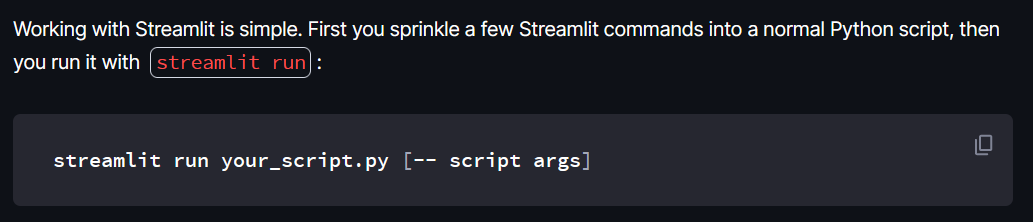

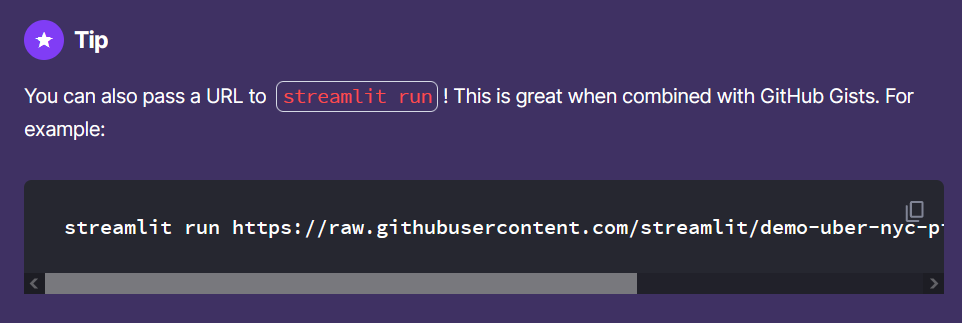

In [4]:
!streamlit --version

Streamlit, version 1.20.0


# Display and Style Data

## Use Magic

You can also write to your app without calling any Streamlit methods. Streamlit supports "magic commands," which means you don't have to use st.write() at all! To see this in action try this snippet:

In [5]:
# My first app
# First attempt at using data to create a table:

import streamlit as st
import pandas as pd

df = pd.DataFrame({
    'first column':[1,2,3,4],
    'second column':[10,20,30,40]
})

df

,first column,second column
0,1,10
1,2,20
2,3,30
3,4,40


## Write a DataFrame

You can pass almost anything to st.write(): text, data, Matplotlib figures, Altair charts, and more. Don't worry, Streamlit will figure it out and render things the right way.

In [6]:
import streamlit as st
import pandas as pd

st.write("Here's our first attempt at using data to create a table:")
st.write(pd.DataFrame({
    'first column': [1, 2, 3, 4],
    'second column': [10, 20, 30, 40]
}))

2023-04-01 14:40:57.317 
  command:

    streamlit run C:\Users\prakh\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


You might be asking yourself, "why wouldn't I always use `st.write()`?" There are a few reasons:

1. Magic and `st.write()` inspect the type of data that you've passed in, and then decide how to best render it in the app. Sometimes you want to draw it another way. For example, instead of drawing a dataframe as an interactive table, you may want to draw it as a static table by using `st.table(df)`.
2. The second reason is that other methods return an object that can be used and modified, either by adding data to it or replacing it.
3. Finally, if you use a more specific Streamlit method you can pass additional arguments to customize its behavior.

For example, let's create a data frame and change its formatting with a Pandas Styler object.

1. Using NumPy to generate random data and using `st.dataframe` to generate an interactive table:

In [7]:
import streamlit as st
import numpy as np

dataframe = np.random.randn(10, 20)
st.dataframe(dataframe)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

2. Expanding on the above by using Pandas `Styler` object to **highilight some elements** in the interactive table:

In [8]:
import streamlit as st
import numpy as np
import pandas as pd

dataframe = pd.DataFrame(
    np.random.randn(10, 20),
    columns=('col %d' % i for i in range(20)))

st.dataframe(dataframe.style.highlight_max(axis=0))

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

## Draw Charts and Maps

Streamlit supports several popular data charting libraries like Matplotlib, Altair, deck.gl, and more. In this section, you'll add a bar chart, line chart, and a map to your app.

### Draw a Line Chart

You can easily add a line chart to your app with `st.line_chart()`. We'll generate a random sample using Numpy and then chart it.

In [9]:
import streamlit as st
import numpy as np
import pandas as pd

chart_data = pd.DataFrame(
     np.random.randn(20, 3),
     columns=['a', 'b', 'c'])

st.line_chart(chart_data)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

### Plot a Map

With `st.map()` you can display data points on a map. Let's use Numpy to generate some sample data and plot it on a map of San Francisco.

In [10]:
import streamlit as st
import numpy as np
import pandas as pd

map_data = pd.DataFrame(
    np.random.randn(1000, 2) / [50, 50] + [37.76, -122.4],
    columns=['lat', 'lon'])

st.map(map_data)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

# Widgets

When you've got the data or model into the state that you want to explore, you can add in widgets like `st.slider()`, `st.button()` or `st.selectbox()`.

**Treat widgets as variables:**

In [15]:
import streamlit as st
x = st.slider('x')  # 👈 this is a widget
st.write(x, 'squared is', x * x)

2023-04-01 15:07:56.154 Session state does not function when running a script without `streamlit run`


Widgets can also be accessed by key, if you choose to specify a string to use as the unique key for the widget:

In [16]:
import streamlit as st
st.text_input("Your name", key="name")

# You can access the value at any point with:
st.session_state.name

# IGNORE THE TRACEBACK - THESE CODES ARE NOT MEANT TO BE RUN IN IPYNB

AttributeError: st.session_state has no attribute "name". Did you forget to initialize it? More info: https://docs.streamlit.io/library/advanced-features/session-state#initialization

Every widget with a key is automatically added to Session State. For more information about Session State, its association with widget state, and its limitations, see [Session State API Reference Guide](https://docs.streamlit.io/library/api-reference/session-state).

## Use Checkboxes to Show/Hide Data

- One use case for checkboxes is to hide or show a specific chart or section in an app.
- `st.checkbox()` takes a single argument, which is the widget label.
- In this sample, the checkbox is used to toggle a conditional statement.

In [17]:
import streamlit as st
import numpy as np
import pandas as pd

if st.checkbox('Show dataframe'):
    chart_data = pd.DataFrame(
       np.random.randn(20, 3),
       columns=['a', 'b', 'c'])

    chart_data

## Use a Selectbox for Options

- Use `st.selectbox` to choose from a series.
- You can write in the options you want, or pass through an array or data frame column.

In [18]:
import streamlit as st
import pandas as pd

df = pd.DataFrame({
    'first column': [1, 2, 3, 4],
    'second column': [10, 20, 30, 40]
    })

option = st.selectbox(
    'Which number do you like best?',
     df['first column'])

'You selected: ', option

('You selected: ', 1)

# Layout

## Sidebar

Streamlit makes it easy to organize your widgets in a left panel sidebar with `st.sidebar`. Each element that's passed to `st.sidebar` is pinned to the left, allowing users to focus on the content in your app while still having access to UI controls.

**For example, if you want to add a selectbox and a slider to a sidebar, use `st.sidebar.slider` and `st.sidebar.selectbox` instead of `st.slider` and `st.selectbox`:**

In [19]:
import streamlit as st

# Add a selectbox to the sidebar:
add_selectbox = st.sidebar.selectbox(
    'How would you like to be contacted?',
    ('Email', 'Home phone', 'Mobile phone')
)

# Add a slider to the sidebar:
add_slider = st.sidebar.slider(
    'Select a range of values',
    0.0, 100.0, (25.0, 75.0)
)

## Columns

Beyond the sidebar, Streamlit offers several other ways to control the layout of your app. `st.columns` lets you place widgets side-by-side, and `st.expander` lets you conserve space by hiding away large content.

In [20]:
import streamlit as st

left_column, right_column = st.columns(2)
# You can use a column just like st.sidebar:
left_column.button('Press me!')

# Or even better, call Streamlit functions inside a "with" block:
with right_column:
    chosen = st.radio(
        'Sorting hat',
        ("Gryffindor", "Ravenclaw", "Hufflepuff", "Slytherin"))
    st.write(f"You are in {chosen} house!")

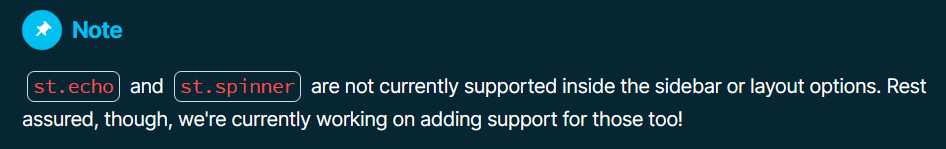

## Show Progress

When adding long running computations to an app, you can use `st.progress()` to display status in real time.

First, let's import `time`. We're going to use the `time.sleep()` method to simulate a long running computation:

In [21]:
import time

Now, let's create a progress bar:

In [22]:
import streamlit as st
import time

'Starting a long computation...'

# Add a placeholder
latest_iteration = st.empty()
bar = st.progress(0)

for i in range(100):
  # Update the progress bar with each iteration.
  latest_iteration.text(f'Iteration {i+1}')
  bar.progress(i + 1)
  time.sleep(0.1)

'...and now we\'re done!'

"...and now we're done!"

# Pages

As apps grow large, it becomes useful to organize them into multiple pages. This makes the app easier to manage as a developer and easier to navigate as a user. Streamlit provides a frictionless way to create multipage apps.

Just add more pages to an existing app as follows:

1. In the folder containing your main script, create a new `pages` folder. Let’s say your main script is named `main_page.py`.
2. Add new `.py` files in the pages folder to add more pages to your app.
3. Run `streamlit run main_page.py` as usual.

That's it! The `main_page.py` script will now correspond to the main page of your app. And you’ll see the other scripts from the pages folder in the sidebar page selector.

**main_page.py**:

In [23]:
import streamlit as st

st.markdown("# Main page 🎈")
st.sidebar.markdown("# Main page 🎈")

DeltaGenerator(_root_container=1, _provided_cursor=None, _parent=DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None), _block_type=None, _form_data=None)

**pages/page2.py:**

In [24]:
import streamlit as st

st.markdown("# Page 2 ❄️")
st.sidebar.markdown("# Page 2 ❄️")

DeltaGenerator(_root_container=1, _provided_cursor=None, _parent=DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None), _block_type=None, _form_data=None)

**pages/page3.py:**

In [25]:
import streamlit as st

st.markdown("# Page 3 🎉")
st.sidebar.markdown("# Page 3 🎉")

DeltaGenerator(_root_container=1, _provided_cursor=None, _parent=DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None), _block_type=None, _form_data=None)

Now run `streamlit run main_page.py` and view your shiny new multipage app!